# Statements BEGINNER

Esta tabla contiene la información de las sentencias.

## 1 - Obtencion de datos

In [33]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'statement__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('statements')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-07-05 10:44:17.171551 Data cache files found ...
2024-07-05 10:44:17.813259 Data cache files successfully loaded!!
The dataset contains 457483 (42.57%) instances for BEGINNER class and 617277 (57.43%) for EXPERT class.


In [34]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'statements'
TABLE_FEATURES = ['statement__category', 'statement__parent', 'statement__statement_role', 'statement__first_child_category','statement__second_child_category','statement__third_child_category', 'statement__height', 'statement__depth', 'statement__has_or_else', 'statement__body_size']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (457483, 10)
As we can see the downloaded data contains a total of 457483 instances. For each instance we have 10 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [35]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 457483 entries, 0 to 1074759
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   statement__category               457483 non-null  object 
 1   statement__parent                 457483 non-null  object 
 2   statement__statement_role         457483 non-null  object 
 3   statement__first_child_category   408952 non-null  object 
 4   statement__second_child_category  239352 non-null  object 
 5   statement__third_child_category   2509 non-null    object 
 6   statement__height                 457483 non-null  int64  
 7   statement__depth                  457483 non-null  int64  
 8   statement__has_or_else            131562 non-null  object 
 9   statement__body_size              134695 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 38.4+ MB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 7 de tipo objeto.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [36]:
X.isnull().sum()

statement__category                      0
statement__parent                        0
statement__statement_role                0
statement__first_child_category      48531
statement__second_child_category    218131
statement__third_child_category     454974
statement__height                        0
statement__depth                         0
statement__has_or_else              325921
statement__body_size                322788
dtype: int64

### IMPORTANTE
Los nulos se deben a que esas variables solo son aplicables para ciertas categorias

In [37]:
print_empty_cols(X)

statement__category
-------------------
0 instancias no tienen un valor para la columna statement__category


statement__parent
-----------------
0 instancias no tienen un valor para la columna statement__parent


statement__statement_role
-------------------------
0 instancias no tienen un valor para la columna statement__statement_role


statement__first_child_category
-------------------------------
0 instancias no tienen un valor para la columna statement__first_child_category


statement__second_child_category
--------------------------------
0 instancias no tienen un valor para la columna statement__second_child_category


statement__third_child_category
-------------------------------
0 instancias no tienen un valor para la columna statement__third_child_category


statement__height
-----------------
0 instancias no tienen un valor para la columna statement__height


statement__depth
----------------
0 instancias no tienen un valor para la columna statement__depth


statement__h

### 2.2 - Describimos los valores de las variables de la tabla.

In [38]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
statement__category,457483,18,AssignmentStmt,202657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__parent,457483,10,If,147757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__statement_role,457483,17,IfBody,110978,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__first_child_category,408952,29,Variable,209831,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__second_child_category,239352,32,Call,98077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__third_child_category,2509,22,Call,976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__height,457483.0,NaN,NaN,NaN,3.444296,2.181544,1.0,2.0,3.0,4.0,40.0
statement__depth,457483.0,NaN,NaN,NaN,2.903843,2.135892,0.0,1.0,3.0,4.0,82.0
statement__has_or_else,131562,2,False,97194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__body_size,134695.0,NaN,NaN,NaN,1.833312,2.116563,1.0,1.0,1.0,2.0,135.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [39]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "statement__depth": [(0.0, 1.0), (1.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 0.0 max: 82.0
    "statement__height": [(0.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 1.0 max: 54.0
    "statement__body_size": [(1.0, 2.0), (2.0, inf)],  # min: 1.0 max: 276
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['statement__depth'], 10))
print(get_statistics(X_copy, ['statement__height'], 10))
print(get_statistics(X_copy, ['statement__body_size'], 10))
print(get_statistics(X_copy, ['statement__category'], 10))
print(get_statistics(X_copy, ['statement__first_child_category'], 10))
print(get_statistics(X_copy, ['statement__second_child_category'], 10))
print(get_statistics(X_copy, ['statement__third_child_category'], 10))
print(get_statistics(X_copy, ['statement__parent'], 10))
print(get_statistics(X_copy, ['statement__statement_role'], 10))
print(get_statistics(X_copy, ['statement__has_or_else'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
statement__depth  count  percentage
       [1.0_3.0) 174241   38.086880
       [4.0_inf] 144744   31.639208
       [3.0_4.0)  98920   21.622661
       [0.0_1.0)  39578    8.651250

statement__height  count  percentage
        [4.0_inf] 173161   37.850805
        [3.0_4.0) 142138   31.069570
        [2.0_3.0)  89894   19.649692
        [0.0_2.0)  52290   11.429933

statement__body_size  count  percentage
             unknown 322788   70.557376
           [1.0_2.0)  83933   18.346693
           [2.0_inf]  50762   11.095931

statement__category  count  percentage
     AssignmentStmt 202657   44.298258
                 If  93851   20.514642
             Return  56571   12.365705
                For  22067    4.823567
         ImportFrom  16383    3.581117
             Import  11370    2.485338
              Raise  11037    2.412549
AugmentedAssignment   9984    2.182376
                Try   8953    1.957013
              While   6691    1.462568

statement__first_ch

In [40]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (457483, 133)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

In [41]:
#plt.figure(figsize=(12, 8))
#sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 10 variable (1 booleana, 3 numericas, 6 categorica) se hara un analisis detallado

### Variable has_or_else (1/10)
Esta variable es de tipo booleano y representa si ciertas categorias de statements tienen la clausula else. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: xlabel='statement__has_or_else', ylabel='Count'>

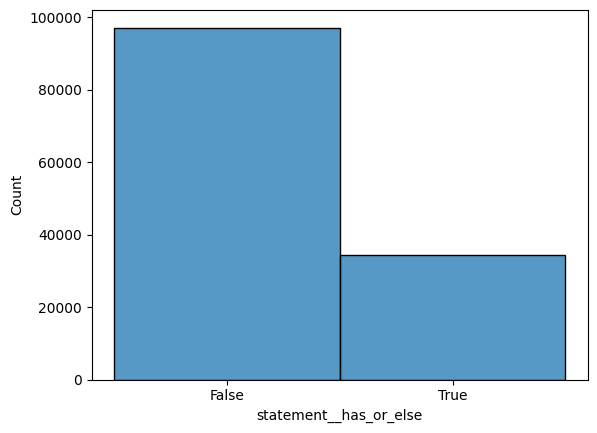

In [42]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(full_table['statement__has_or_else'], discrete=True)

In [43]:
num_true_values = len(full_table[full_table['statement__has_or_else'] == True])
num_false_values = len(full_table[full_table['statement__has_or_else'] == False])
std = full_table['statement__has_or_else'].std()
freq_true = len(full_table[full_table['statement__has_or_else'] == True]) / len(full_table['statement__has_or_else'])
freq_false = len(full_table[full_table['statement__has_or_else'] == False]) / len(full_table['statement__has_or_else'])
print(f'La variable has_or_else contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_or_else a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_or_else a False es {freq_false}.')

La variable has_or_else contiene 34368 valores verdaderos y 97194 valores falsos. Y, la desviación típica es de 0.43930691689276785
La frecuencia con la que programa puede tener la variable has_or_else a True es 0.0751241029721323.
La frecuencia con la que programa puede tener la variable has_or_else a False es 0.21245379609734133.


### IMPORTANTE
No suma el 100% debido a los valores nulos

In [44]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(full_table, 'statement__has_or_else', possible_values)

La variable statement__has_or_else contiene 3 valores distintos.
El umbral de outlier es de 0.06666666666666667%
La variable statement__has_or_else toma el valor de None en un 71.24% de los items.
La variable statement__has_or_else toma el valor de False en un 21.25% de los items.
La variable statement__has_or_else toma el valor de True en un 7.512% de los items.


In [45]:
full_table[full_table['statement__has_or_else'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__category,statement__parent,statement__statement_role,statement__first_child_category,statement__second_child_category,statement__third_child_category,statement__height,statement__depth,statement__has_or_else,statement__body_size,statement__expertise_level
count,34368,34368,34368,33624,284,0,34368.000000,34368.000000,34368,34368.000000,34368
unique,4,10,16,10,6,0,NaN,NaN,1,NaN,1
top,If,If,IfElseBody,Compare,Call,NaN,NaN,NaN,True,NaN,BEGINNER
freq,33290,17419,11550,20360,112,NaN,NaN,NaN,34368,NaN,34368
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.317912,5.737634,NaN,1.809212,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.027649,3.248316,NaN,1.813391,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,7.000000,NaN,2.000000,NaN


### Variable height (2/10)
Esta variable representa la distancia del statement al root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 40. Con una media de 3.44.

<Axes: ylabel='statement__height'>

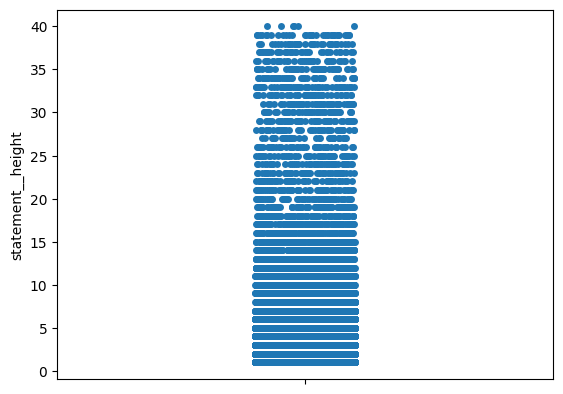

In [46]:
sns.stripplot(X['statement__height'])

In [47]:
print_outliers_for_df_column(X, 'statement__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7208736615303235
Rango valores atípicos extremos (Tukey): [-4.0,10.0]
Rango valores atípicos leves (Tukey): [-1.0,7.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.7593581442896304,57.629909997918304]
-3.0IQR: 0 instancias tienen un valor para statement__height inferior a -4.0 (Q1-3*IQR) para statement__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__height inferior a -1.0 (Q1-1.5*IQR) para statement__height. Representando un 0.0% del total de instancias.
+1.5IQR: 14240 instancias tienen un valor para statement__height superior a 7.0 (Q3+1.5*IQR) para statement__height. Representando un 3.113% del total de instancias.
+3.0IQR: 3579 instancias tienen un valor para statement__height superior a 10.0 (Q3-3*IQR) para statement__height. Representando un 0.7823% del total de instancias.
L: 52290 instancias tienen un valor para statement__height inferior a 1.759358144

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 10.0 (Con un MC de 72 usamos Tuckey Extremo)

In [48]:
X[X['statement__height'] > 10].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__height,statement__depth,statement__body_size,statement__category_AnnotatedAssignment,statement__category_Assert,statement__category_AssignmentStmt,statement__category_AugmentedAssignment,statement__category_Break,statement__category_Continue,statement__category_Delete,...,statement__third_child_category_Logical,statement__third_child_category_NoneLiteral,statement__third_child_category_SetLiteral,statement__third_child_category_StringLiteral,statement__third_child_category_Ternary,statement__third_child_category_TupleLiteral,statement__third_child_category_UnaryArithmetic,statement__third_child_category_Variable,statement__has_or_else_False,statement__has_or_else_True
count,3579.000000,3579.000000,1368.000000,3579.0,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,...,3579.0,3579.0,3579.0,3579.0,3579.0,3579.0,3579.0,3579.0,3579.000000,3579.000000
mean,17.343113,4.726181,1.872076,0.0,0.003353,0.365186,0.112881,0.016485,0.001676,0.000279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.128248,0.253982
std,7.962226,5.373518,1.510416,0.0,0.057815,0.481550,0.316491,0.127349,0.040916,0.016715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334413,0.435348
min,11.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,11.000000,2.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,14.000000,3.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,21.000000,5.000000,3.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
max,40.000000,32.000000,11.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


### Variable depth (3/10)
Esta variable representa la distancia desde el statement hasta una hoja del ast. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 82. Con una media de 2.90.

<Axes: ylabel='statement__depth'>

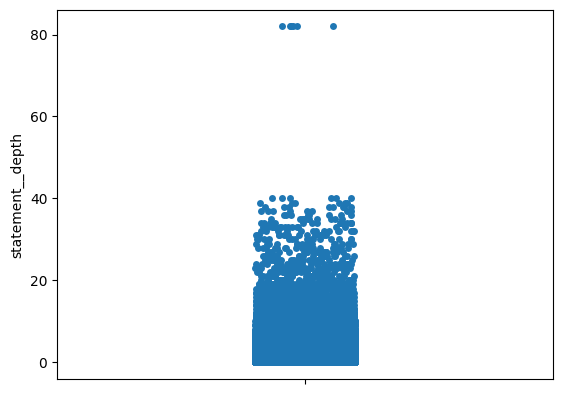

In [49]:
sns.stripplot(X['statement__depth'])

### IMPORTANTE
Los valores maximos estan muy alejados de los siguientes.

In [50]:
print_outliers_for_df_column(X, 'statement__depth')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9201401609792462
Rango valores atípicos extremos (Tukey): [-8.0,13.0]
Rango valores atípicos leves (Tukey): [-3.5,8.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.8202904184026498,182.50882516418534]
-3.0IQR: 0 instancias tienen un valor para statement__depth inferior a -8.0 (Q1-3*IQR) para statement__depth. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__depth inferior a -3.5 (Q1-1.5*IQR) para statement__depth. Representando un 0.0% del total de instancias.
+1.5IQR: 6501 instancias tienen un valor para statement__depth superior a 8.5 (Q3+1.5*IQR) para statement__depth. Representando un 1.421% del total de instancias.
+3.0IQR: 953 instancias tienen un valor para statement__depth superior a 13.0 (Q3-3*IQR) para statement__depth. Representando un 0.2083% del total de instancias.
L: 39578 instancias tienen un valor para statement__depth inferior a 0.8202904184026498 par

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 13.0 (Con un MC de 92 usamos Tuckey Extremo)

In [51]:
X[X['statement__depth'] > 13].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__height,statement__depth,statement__body_size,statement__category_AnnotatedAssignment,statement__category_Assert,statement__category_AssignmentStmt,statement__category_AugmentedAssignment,statement__category_Break,statement__category_Continue,statement__category_Delete,...,statement__third_child_category_Logical,statement__third_child_category_NoneLiteral,statement__third_child_category_SetLiteral,statement__third_child_category_StringLiteral,statement__third_child_category_Ternary,statement__third_child_category_TupleLiteral,statement__third_child_category_UnaryArithmetic,statement__third_child_category_Variable,statement__has_or_else_False,statement__has_or_else_True
count,953.000000,953.000000,927.000000,953.0,953.0,953.000000,953.0,953.0,953.0,953.0,...,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.0,953.000000,953.000000
mean,8.066107,20.544596,2.541532,0.0,0.0,0.027282,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222455,0.750262
std,6.965464,8.267987,2.409518,0.0,0.0,0.162990,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.416114,0.433088
min,1.000000,14.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,3.000000,15.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
50%,5.000000,18.000000,2.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
75%,12.000000,24.000000,3.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
max,29.000000,82.000000,28.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


### IMPORTANTE
Hay que revisar los 6 que tienen un valor mayor de 80 

### Variable body_size (4/10)
Esta variable representa el número de sentencias o expresiones que se definen dentro del cuerpo de ciertas categorías de sentencias. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 135. Con una media de 1.83.

<Axes: ylabel='statement__body_size'>

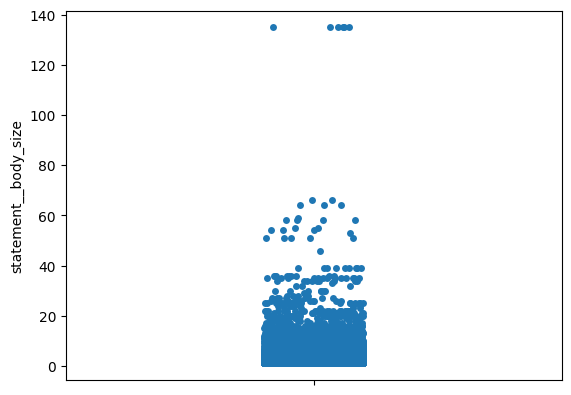

In [52]:
sns.stripplot(X['statement__body_size'])

### IMPORTANTE
Los valores maximos estan muy alejados de los siguientes.

In [53]:
print_outliers_for_df_column(X,'statement__body_size')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6989190164445758
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.8700689624216986,26.56054206010261]
-3.0IQR: 0 instancias tienen un valor para statement__body_size inferior a -2.0 (Q1-3*IQR) para statement__body_size. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__body_size inferior a -0.5 (Q1-1.5*IQR) para statement__body_size. Representando un 0.0% del total de instancias.
+1.5IQR: 12346 instancias tienen un valor para statement__body_size superior a 3.5 (Q3+1.5*IQR) para statement__body_size. Representando un 2.699% del total de instancias.
+3.0IQR: 4444 instancias tienen un valor para statement__body_size superior a 5.0 (Q3-3*IQR) para statement__body_size. Representando un 0.9714% del total de instancias.
L: 0 instancias tienen un valor para statement__body_size in

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 26.5 (Con un MC de 69 usamos U)

In [54]:
X[X['statement__body_size'] > 26.5].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__height,statement__depth,statement__body_size,statement__category_AnnotatedAssignment,statement__category_Assert,statement__category_AssignmentStmt,statement__category_AugmentedAssignment,statement__category_Break,statement__category_Continue,statement__category_Delete,...,statement__third_child_category_Logical,statement__third_child_category_NoneLiteral,statement__third_child_category_SetLiteral,statement__third_child_category_StringLiteral,statement__third_child_category_Ternary,statement__third_child_category_TupleLiteral,statement__third_child_category_UnaryArithmetic,statement__third_child_category_Variable,statement__has_or_else_False,statement__has_or_else_True
count,92.000000,92.000000,92.000000,92.0,92.0,92.0,92.0,92.0,92.0,92.0,...,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.000000,92.000000
mean,2.130435,6.728261,45.478260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.826087,0.173913
std,1.091600,3.031350,26.047497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.381112,0.381112
min,1.000000,2.000000,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,1.000000,5.000000,32.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000
50%,2.000000,6.000000,35.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000
75%,3.000000,8.000000,51.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000
max,4.000000,22.000000,135.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


### IMPORTANTE
Hay que revisar los que tienen 140

### Variable category (5/10)
Esta variable es de tipo categórica y representa el tipo de sentencia.

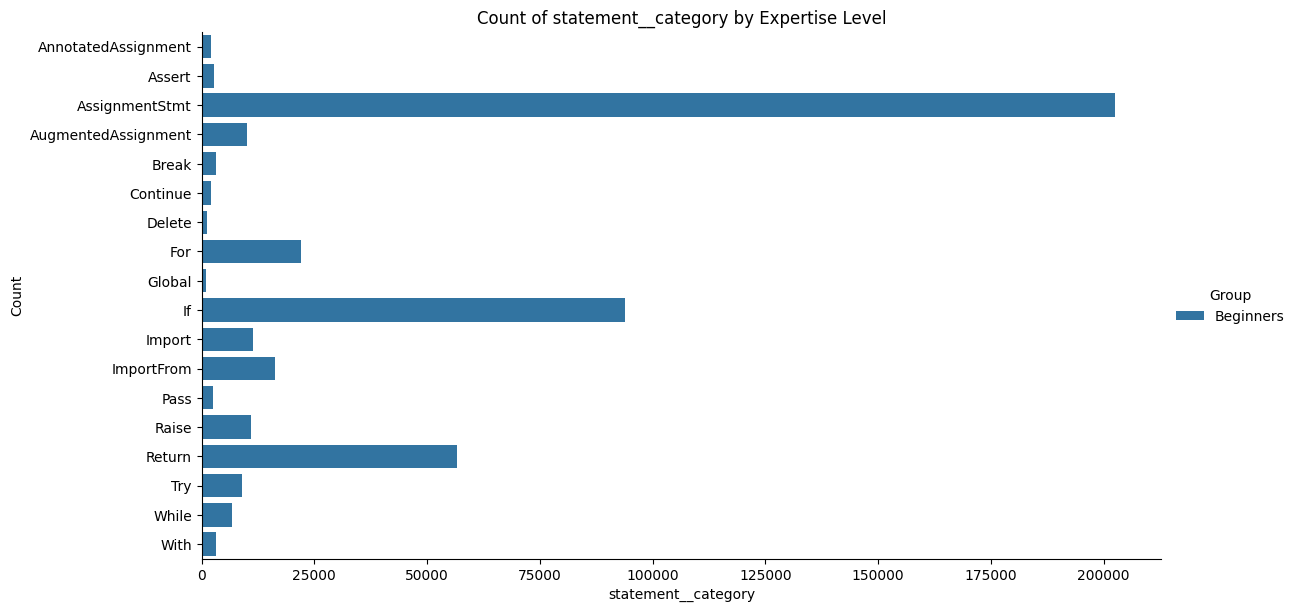

In [55]:
print_categorical_histogram(full_table, 'statement__category', TARGET_FEATURE, vertical=True, include_all=False, include_experts=False)

In [56]:
print_frequency_anal_for_cat_var(full_table, 'statement__category')

La variable statement__category contiene 18 valores distintos.
El umbral de outlier es de 0.011111111111111112%
La variable statement__category toma el valor de AssignmentStmt en un 44.3% de los items.
La variable statement__category toma el valor de If en un 20.51% de los items.
La variable statement__category toma el valor de Return en un 12.37% de los items.
La variable statement__category toma el valor de For en un 4.824% de los items.
La variable statement__category toma el valor de ImportFrom en un 3.581% de los items.
La variable statement__category toma el valor de Import en un 2.485% de los items.
La variable statement__category toma el valor de Raise en un 2.413% de los items.
La variable statement__category toma el valor de AugmentedAssignment en un 2.182% de los items.
La variable statement__category toma el valor de Try en un 1.957% de los items.
La variable statement__category toma el valor de While en un 1.463% de los items.
La variable statement__category toma el valor 

In [57]:
print_values_usage_for_cat_var(full_table, 'statement__category', STATEMENT_CATEGORY_VALUES)

La variable statement__category puede tomar 24 valores distintos
	18 (75.0%) valores utilizados
	6 (25.0%) valores NO utilizados
		La variable statement__category nunca toma valor AsyncWith.
		La variable statement__category nunca toma valor Nonlocal.
		La variable statement__category nunca toma valor Match.
		La variable statement__category nunca toma valor ExceptHandler.
		La variable statement__category nunca toma valor TypeAlias.
		La variable statement__category nunca toma valor AsyncFor.


### Variable parent (6/10)
Esta variable es de tipo categórica y representa el tipo del padre de la sentencia.

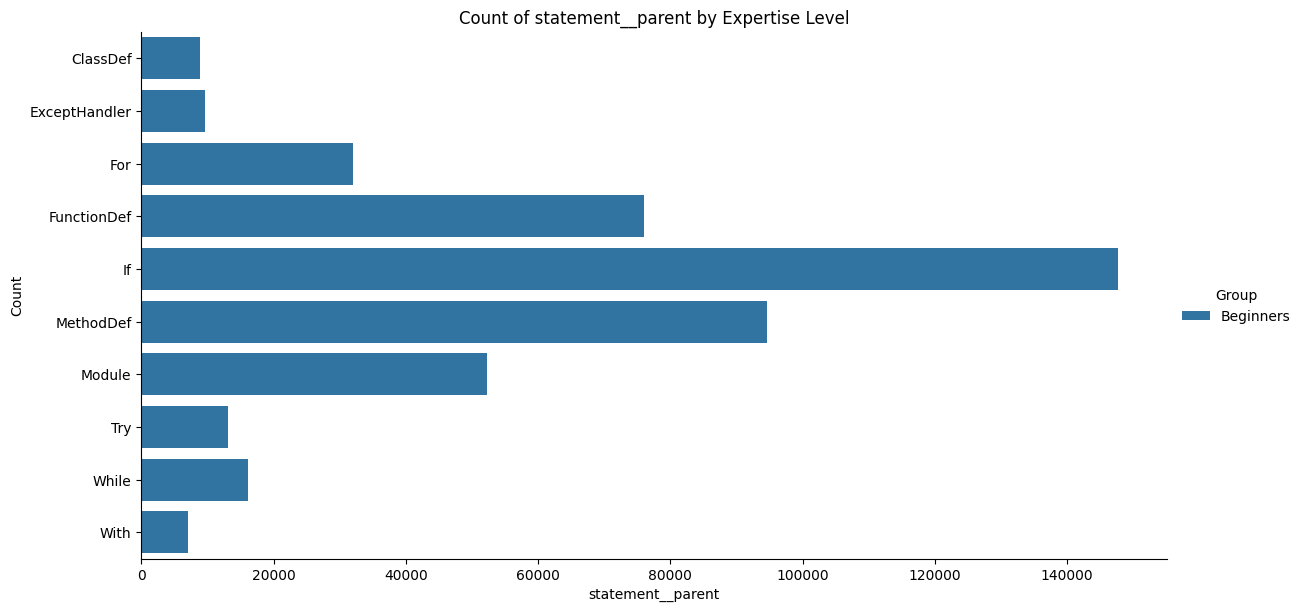

In [58]:
print_categorical_histogram(full_table, 'statement__parent', TARGET_FEATURE, vertical=True, include_all=False, include_experts=False)

In [59]:
print_frequency_anal_for_cat_var(full_table, 'statement__parent')

La variable statement__parent contiene 10 valores distintos.
El umbral de outlier es de 0.02%
La variable statement__parent toma el valor de If en un 32.3% de los items.
La variable statement__parent toma el valor de MethodDef en un 20.68% de los items.
La variable statement__parent toma el valor de FunctionDef en un 16.63% de los items.
La variable statement__parent toma el valor de Module en un 11.43% de los items.
La variable statement__parent toma el valor de For en un 7.006% de los items.
La variable statement__parent toma el valor de While en un 3.524% de los items.
La variable statement__parent toma el valor de Try en un 2.859% de los items.
La variable statement__parent toma el valor de ExceptHandler en un 2.093% de los items.
La variable statement__parent toma el valor de ClassDef en un 1.941% de los items.
La variable statement__parent toma el valor de With en un 1.542% de los items.


In [60]:
print_values_usage_for_cat_var(full_table, 'statement__parent', STATEMENT_PARENT_VALUES)

La variable statement__parent puede tomar 28 valores distintos
	10 (35.71%) valores utilizados
	18 (64.29%) valores NO utilizados
		La variable statement__parent nunca toma valor AsyncWith.
		La variable statement__parent nunca toma valor Nonlocal.
		La variable statement__parent nunca toma valor Return.
		La variable statement__parent nunca toma valor Continue.
		La variable statement__parent nunca toma valor Match.
		La variable statement__parent nunca toma valor ImportFrom.
		La variable statement__parent nunca toma valor AnnotatedAssignment.
		La variable statement__parent nunca toma valor Global.
		La variable statement__parent nunca toma valor Import.
		La variable statement__parent nunca toma valor Raise.
		La variable statement__parent nunca toma valor Assert.
		La variable statement__parent nunca toma valor Break.
		La variable statement__parent nunca toma valor TypeAlias.
		La variable statement__parent nunca toma valor AugmentedAssignment.
		La variable statement__parent nun

### Variable statement_role (7/10)
Esta variable es de tipo categórica y representa el rol que representa la sentencia en su padre.

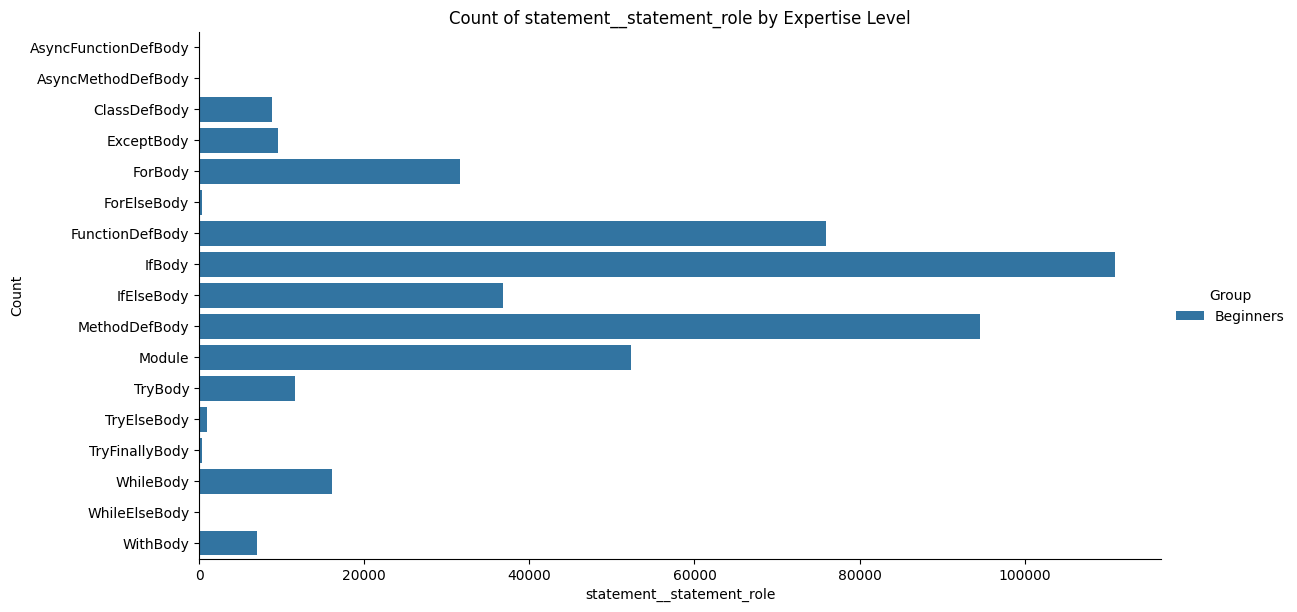

In [61]:
print_categorical_histogram(full_table, 'statement__statement_role', TARGET_FEATURE, vertical=True, include_all=False, include_experts=False)

In [62]:
print_frequency_anal_for_cat_var(full_table, 'statement__statement_role')

La variable statement__statement_role contiene 17 valores distintos.
El umbral de outlier es de 0.011764705882352941%
La variable statement__statement_role toma el valor de IfBody en un 24.26% de los items.
La variable statement__statement_role toma el valor de MethodDefBody en un 20.68% de los items.
La variable statement__statement_role toma el valor de FunctionDefBody en un 16.59% de los items.
La variable statement__statement_role toma el valor de Module en un 11.43% de los items.
La variable statement__statement_role toma el valor de IfElseBody en un 8.039% de los items.
La variable statement__statement_role toma el valor de ForBody en un 6.921% de los items.
La variable statement__statement_role toma el valor de WhileBody en un 3.507% de los items.
La variable statement__statement_role toma el valor de TryBody en un 2.553% de los items.
La variable statement__statement_role toma el valor de ExceptBody en un 2.093% de los items.
La variable statement__statement_role toma el valor 

In [63]:
print_values_usage_for_cat_var(full_table, 'statement__statement_role', STATEMENT_ROLE_VALUES)

La variable statement__statement_role puede tomar 23 valores distintos
	17 (73.91%) valores utilizados
	6 (26.09%) valores NO utilizados
		La variable statement__statement_role nunca toma valor AsyncForBody.
		La variable statement__statement_role nunca toma valor TryHandler.
		La variable statement__statement_role nunca toma valor AsyncForElseBody.
		La variable statement__statement_role nunca toma valor TryHandlerStar.
		La variable statement__statement_role nunca toma valor CaseBody.
		La variable statement__statement_role nunca toma valor AsyncWithBody.


### Variable first_child_category (8/10)
Esta variable es de tipo categorica y representa la categoria del primer hijo de la sentencia.

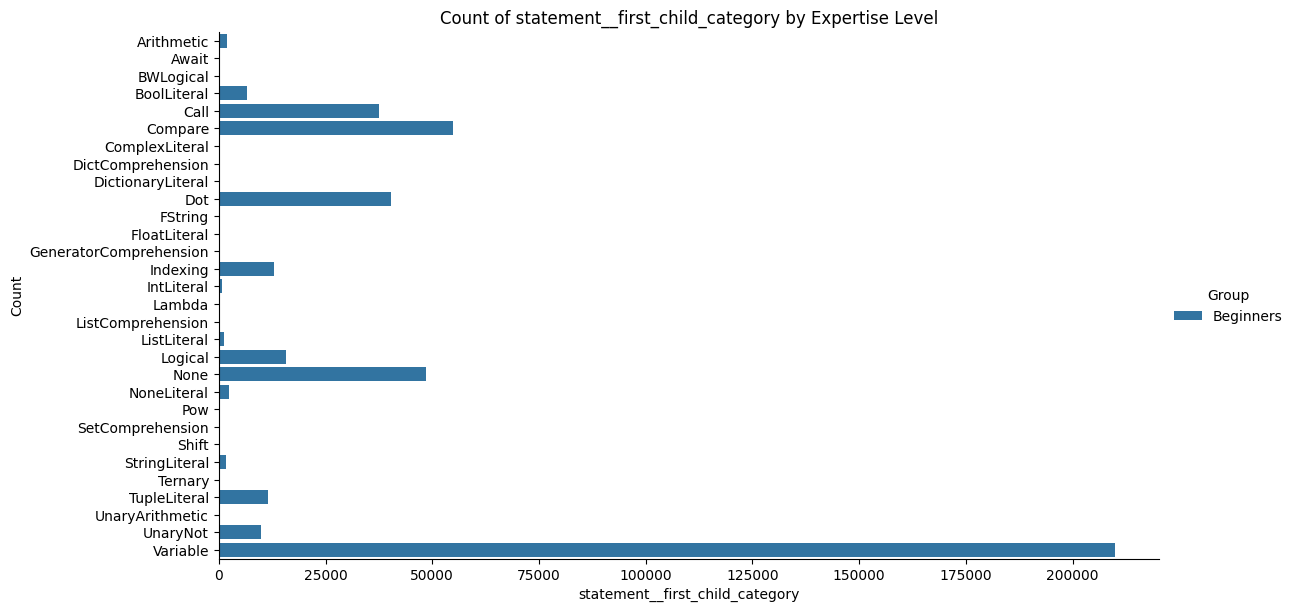

In [64]:
print_categorical_histogram(full_table, 'statement__first_child_category', TARGET_FEATURE, vertical=True, include_all=False, include_experts=False, fillna=True)

In [65]:
print_frequency_anal_for_cat_var(full_table, 'statement__first_child_category')

La variable statement__first_child_category contiene 30 valores distintos.
El umbral de outlier es de 0.006666666666666667%
La variable statement__first_child_category toma el valor de Variable en un 45.87% de los items.
La variable statement__first_child_category toma el valor de Compare en un 11.99% de los items.
La variable statement__first_child_category toma el valor de None en un 10.61% de los items.
La variable statement__first_child_category toma el valor de Dot en un 8.802% de los items.
La variable statement__first_child_category toma el valor de Call en un 8.211% de los items.
La variable statement__first_child_category toma el valor de Logical en un 3.441% de los items.
La variable statement__first_child_category toma el valor de Indexing en un 2.834% de los items.
La variable statement__first_child_category toma el valor de TupleLiteral en un 2.495% de los items.
La variable statement__first_child_category toma el valor de UnaryNot en un 2.169% de los items.
La variable st

In [66]:
print_values_usage_for_cat_var(full_table, 'statement__first_child_category', STATEMENT_CHILDREN_VALUES)

La variable statement__first_child_category puede tomar 42 valores distintos
	30 (71.43%) valores utilizados
	13 (30.95%) valores NO utilizados
		La variable statement__first_child_category nunca toma valor None.
		La variable statement__first_child_category nunca toma valor SetLiteral.
		La variable statement__first_child_category nunca toma valor Star.
		La variable statement__first_child_category nunca toma valor FormattedValue.
		La variable statement__first_child_category nunca toma valor UnaryBWNot.
		La variable statement__first_child_category nunca toma valor NoneType.
		La variable statement__first_child_category nunca toma valor AssignmentExp.
		La variable statement__first_child_category nunca toma valor Yield.
		La variable statement__first_child_category nunca toma valor Slice.
		La variable statement__first_child_category nunca toma valor EllipsisLiteral.
		La variable statement__first_child_category nunca toma valor Parameter.
		La variable statement__first_child_categor

### Variable second_child_category (9/10)
Esta variable es de tipo categorica y representa la categoria del segundo hijo de la sentencia.

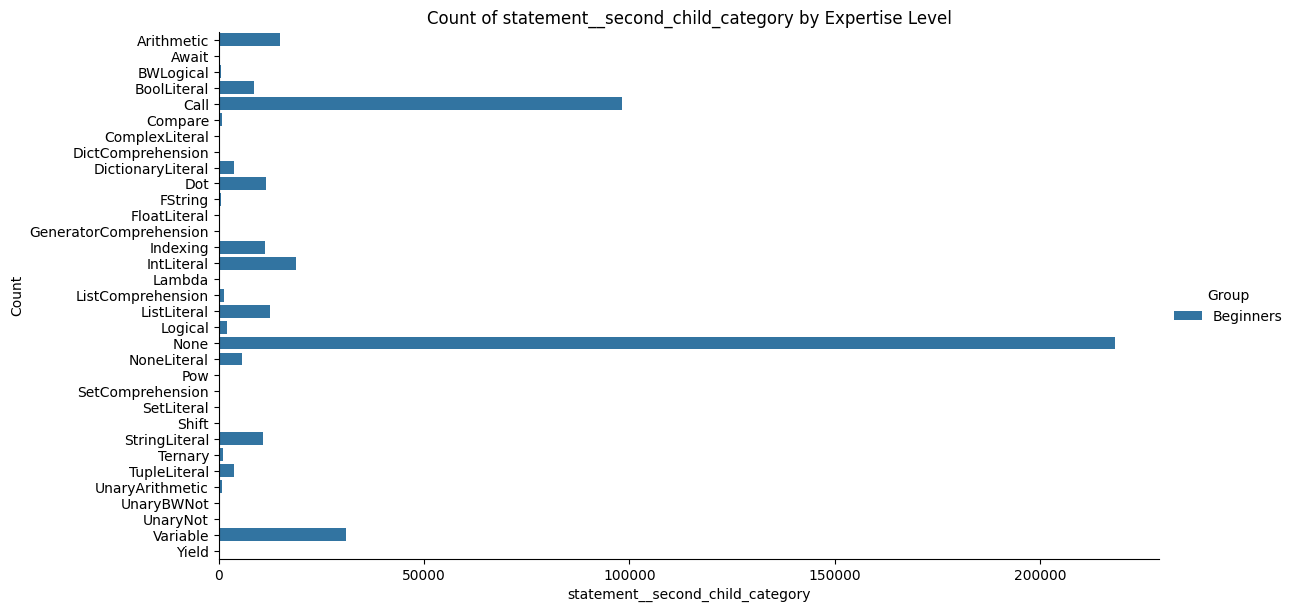

In [67]:
print_categorical_histogram(full_table, 'statement__second_child_category', TARGET_FEATURE, vertical=True, include_all=False, include_experts=False, fillna=True)

In [68]:
print_frequency_anal_for_cat_var(full_table, 'statement__second_child_category')

La variable statement__second_child_category contiene 33 valores distintos.
El umbral de outlier es de 0.006060606060606061%
La variable statement__second_child_category toma el valor de None en un 47.68% de los items.
La variable statement__second_child_category toma el valor de Call en un 21.44% de los items.
La variable statement__second_child_category toma el valor de Variable en un 6.75% de los items.
La variable statement__second_child_category toma el valor de IntLiteral en un 4.132% de los items.
La variable statement__second_child_category toma el valor de Arithmetic en un 3.236% de los items.
La variable statement__second_child_category toma el valor de ListLiteral en un 2.718% de los items.
La variable statement__second_child_category toma el valor de Dot en un 2.516% de los items.
La variable statement__second_child_category toma el valor de Indexing en un 2.472% de los items.
La variable statement__second_child_category toma el valor de StringLiteral en un 2.345% de los it

In [69]:
print_values_usage_for_cat_var(full_table, 'statement__second_child_category', STATEMENT_CHILDREN_VALUES)

La variable statement__second_child_category puede tomar 42 valores distintos
	33 (78.57%) valores utilizados
	10 (23.81%) valores NO utilizados
		La variable statement__second_child_category nunca toma valor None.
		La variable statement__second_child_category nunca toma valor Star.
		La variable statement__second_child_category nunca toma valor FormattedValue.
		La variable statement__second_child_category nunca toma valor NoneType.
		La variable statement__second_child_category nunca toma valor AssignmentExp.
		La variable statement__second_child_category nunca toma valor Slice.
		La variable statement__second_child_category nunca toma valor EllipsisLiteral.
		La variable statement__second_child_category nunca toma valor Parameter.
		La variable statement__second_child_category nunca toma valor MatMult.
		La variable statement__second_child_category nunca toma valor YieldFrom.
La variable statement__second_child_category toma 1 valores desconocidos
		La variable statement__second_ch

### Variable third_child_category (10/10)
Esta variable es de tipo categorica y representa la categoria del tercer hijo de la sentencia.

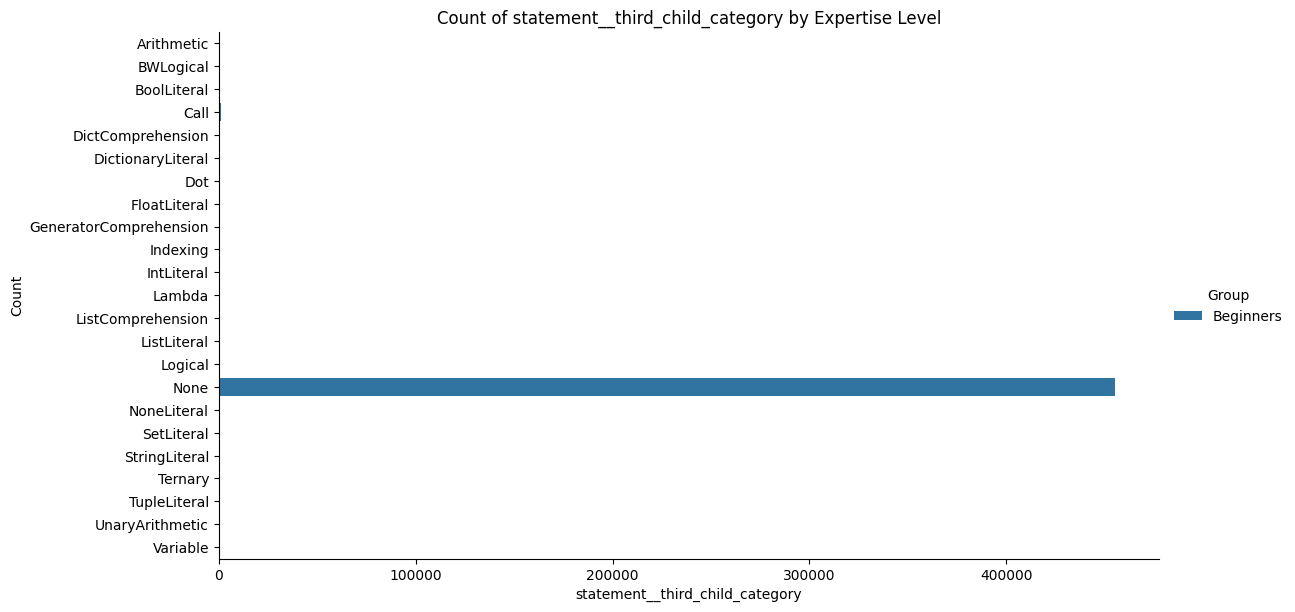

In [70]:
print_categorical_histogram(full_table, 'statement__third_child_category', TARGET_FEATURE, vertical=True, include_all=False, include_experts=False, fillna=True)

In [71]:
print_frequency_anal_for_cat_var(full_table, 'statement__third_child_category')

La variable statement__third_child_category contiene 23 valores distintos.
El umbral de outlier es de 0.008695652173913044%
La variable statement__third_child_category toma el valor de None en un 99.45% de los items.
La variable statement__third_child_category toma el valor de Call en un 0.2133% de los items.
La variable statement__third_child_category toma el valor de ListLiteral en un 0.06492% de los items.
La variable statement__third_child_category toma el valor de NoneLiteral en un 0.05727% de los items.
La variable statement__third_child_category toma el valor de DictionaryLiteral en un 0.04831% de los items.
La variable statement__third_child_category toma el valor de Dot en un 0.03782% de los items.
La variable statement__third_child_category toma el valor de Variable en un 0.03629% de los items.
La variable statement__third_child_category toma el valor de StringLiteral en un 0.02011% de los items.
La variable statement__third_child_category toma el valor de Indexing en un 0.01

In [72]:
print_values_usage_for_cat_var(full_table, 'statement__third_child_category', STATEMENT_CHILDREN_VALUES)

La variable statement__third_child_category puede tomar 42 valores distintos
	23 (54.76%) valores utilizados
	20 (47.62%) valores NO utilizados
		La variable statement__third_child_category nunca toma valor FormattedValue.
		La variable statement__third_child_category nunca toma valor SetComprehension.
		La variable statement__third_child_category nunca toma valor Slice.
		La variable statement__third_child_category nunca toma valor Await.
		La variable statement__third_child_category nunca toma valor MatMult.
		La variable statement__third_child_category nunca toma valor UnaryNot.
		La variable statement__third_child_category nunca toma valor None.
		La variable statement__third_child_category nunca toma valor Star.
		La variable statement__third_child_category nunca toma valor Pow.
		La variable statement__third_child_category nunca toma valor YieldFrom.
		La variable statement__third_child_category nunca toma valor NoneType.
		La variable statement__third_child_category nunca toma v

## Multivariate

Isolation forest algorithm

In [73]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
X['statement__body_size'] = X['statement__body_size'].fillna(0) # Fill NaN values with 0
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,statement__category,statement__parent,statement__statement_role,statement__first_child_category,statement__second_child_category,statement__third_child_category,statement__height,statement__depth,statement__has_or_else,statement__body_size,statement__expertise_level
459,For,With,WithBody,TupleLiteral,Call,None,6,6,False,4.0,BEGINNER
469,For,With,WithBody,TupleLiteral,Call,None,6,6,False,4.0,BEGINNER
489,For,With,WithBody,TupleLiteral,Call,None,6,6,False,4.0,BEGINNER
499,For,With,WithBody,TupleLiteral,Call,None,6,6,False,4.0,BEGINNER
904,For,With,WithBody,TupleLiteral,Variable,None,4,3,False,2.0,BEGINNER
...,...,...,...,...,...,...,...,...,...,...,...
1067685,For,Try,TryBody,TupleLiteral,Call,None,6,4,False,1.0,BEGINNER
1069321,For,Try,TryBody,TupleLiteral,Call,None,3,7,False,5.0,BEGINNER
1070851,For,FunctionDef,FunctionDefBody,TupleLiteral,Variable,None,5,6,False,7.0,BEGINNER
1073280,While,While,WhileBody,BoolLiteral,None,None,4,6,False,2.0,BEGINNER


In [74]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
statement__height,545.0,4.315596,2.393203,1.0,3.0,4.0,5.0,26.0
statement__depth,545.0,6.168808,2.872432,1.0,4.0,6.0,7.0,22.0
statement__body_size,545.0,3.867890,3.647241,0.0,2.0,3.0,5.0,28.0
statement__category_AnnotatedAssignment,545.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
statement__category_Assert,545.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
statement__third_child_category_TupleLiteral,545.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
statement__third_child_category_UnaryArithmetic,545.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
statement__third_child_category_Variable,545.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
statement__has_or_else_False,545.0,0.831193,0.374926,0.0,1.0,1.0,1.0,1.0


In [75]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
statement__height,456938.0,3.443257,2.181075,1.0,2.0,3.0,4.0,40.0
statement__depth,456938.0,2.899949,2.131882,0.0,1.0,3.0,4.0,82.0
statement__body_size,456938.0,0.535806,1.410864,0.0,0.0,0.0,1.0,135.0
statement__category_AnnotatedAssignment,456938.0,0.004456,0.066603,0.0,0.0,0.0,0.0,1.0
statement__category_Assert,456938.0,0.005852,0.076274,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
statement__third_child_category_TupleLiteral,456938.0,0.000131,0.011458,0.0,0.0,0.0,0.0,1.0
statement__third_child_category_UnaryArithmetic,456938.0,0.000011,0.003308,0.0,0.0,0.0,0.0,1.0
statement__third_child_category_Variable,456938.0,0.000363,0.019057,0.0,0.0,0.0,0.0,1.0
statement__has_or_else_False,456938.0,0.211716,0.408525,0.0,0.0,0.0,0.0,1.0
